In [96]:
# import işlemleri

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

In [3]:
path = "/content/drive/MyDrive/Datasets/insurance.csv"
df = pd.read_csv(path)

# Verisetinin İncelenmesi

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**Verisetindeki değişkenler neyi ifade ediyor ?**

1. **Age (Yaş):** Sigorta yaptıran kişinin yaşı. Yaş arttıkça sağlık riskleri de artar.
2. **Sex (Cinsiyet):** Sigorta yaptıranın cinsiyeti (erkek/kadın).
3. **BMI (Vücut Kitle İndeksi):** Kişinin kilo ve boyuna göre hesaplanan sağlık göstergesi.
4. **Children (Çocuk Sayısı):** Sigorta kapsamındaki çocuk sayısı.
5. **Smoker (Sigara Kullanımı):** Sigara içip içmediği bilgisi. Sigara içmek, sağlık risklerini ciddi şekilde artırır.
6. **Region (Bölge):** Kişinin yaşadığı coğrafi bölge (northeast, northwest, southeast, southwest).
7. **Charges (Sigorta Ücreti):** Sağlık sigortası için ödenen prim miktarı (hedef değişken).


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [12]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Veri setinde boş bir değer bulunmuyor .

**Sayısal ve Kategorik Sütunların Belirlenmesi**

In [13]:
# Sayısal Sütunlar
numeric_columns = df.select_dtypes(include=["number"]).columns
print("Sayısal Sütunlar ;")
numeric_columns

Sayısal Sütunlar ;


Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [14]:
# Kategorik Sütunlar
categorical_columns = df.select_dtypes(include=["object"]).columns
print("Kategorik Sütunlar ;")
categorical_columns


Kategorik Sütunlar ;


Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
# Sayısal sütunlarımıza StandartScaler yöntemini uyguladık
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,0.298584
1,-1.509965,male,0.509621,-0.078767,no,southeast,-0.953689
2,-0.797954,male,0.383307,1.580926,no,southeast,-0.728675
3,-0.441948,male,-1.305531,-0.908614,no,northwest,0.719843
4,-0.513149,male,-0.292556,-0.908614,no,northwest,-0.776802


Kategorik değişkenlerimize Encoding işlemleri uygulamadan önce hangi değerleri içerdiklerine bakalım

In [16]:
# 'region'
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
# 'sex'
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
# 'smoker'
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

Verisetimizdeki kategorik değişkenlerde az sayıda kategori olduğundan dolayı 'One Hot Encoding' uygulayabiliriz

In [19]:
# Bu aşamaya geçmeden önce datasetin bir kopyasını bulunduralım.
df_copy = df.copy

In [20]:
# Kategorik değişkenlere 'One Hot Encoding' Uygulanması

One_Hot_Encoder = OneHotEncoder(sparse_output=False)
One_Hot_Encoded = One_Hot_Encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(One_Hot_Encoded, columns=One_Hot_Encoder.get_feature_names_out(categorical_columns))
one_hot_df

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [21]:
# Bu aşamada Encoding uygulanmamış olan önceki değişkenleri silip yerlerine Encoding uygulanmış olan değişkenler eklendi
df = df.drop(categorical_columns, axis=1) # Hücre tekrardan çalıştırıldığı için hata mesajı döndürdü.
df = pd.concat([df, one_hot_df], axis=1)

In [22]:
# Datasetin son hali bu şekilde
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,-0.953689,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,-0.728675,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.719843,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,-0.776802,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,-0.908614,-0.914002,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,-0.961596,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,-0.930362,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


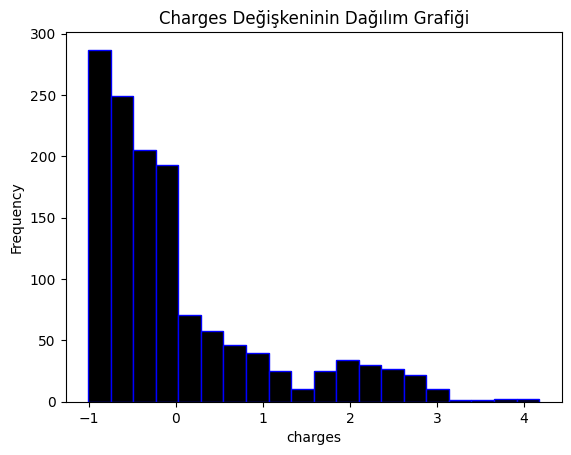

In [23]:
plt.hist(df['charges'], bins=20, color= 'black', edgecolor = 'blue')
plt.xlabel('charges')
plt.ylabel('Frequency')
plt.title('Charges Değişkeninin Dağılım Grafiği')
plt.show()

**Grafiğin Yorumlanması**

- Grafiğe bakıldığında 'sola yığılmış' 'sağa çarpık' bir dağılım gösteriyor.
- Öncesinde standartlaştırma işlemi uygulandığı için veriler -1 ile 4 arasına sıkıştırılmış.
- Veri setindeki bireylerin çoğu düşük sigorta harcaması yapıyor (-1)
- Bireyler genel olarak düşük harcama yapıyor fakat, çok yüksek harcama yapan bireyler de mevcut (-4) bu bireyler aykırı değer tehlikesi oluşturuyor.

**Korelasyon Matrisinin Oluşturulması**

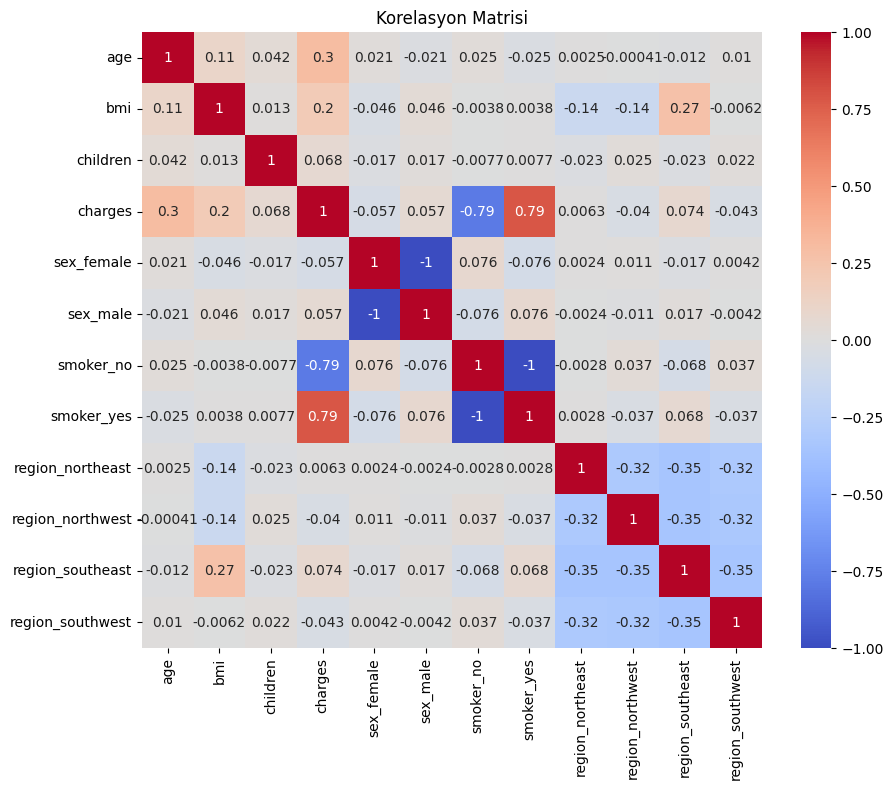

In [24]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

**Random Forest Yöntemi İle Özellik Önem Skorunun Oluşturulması**

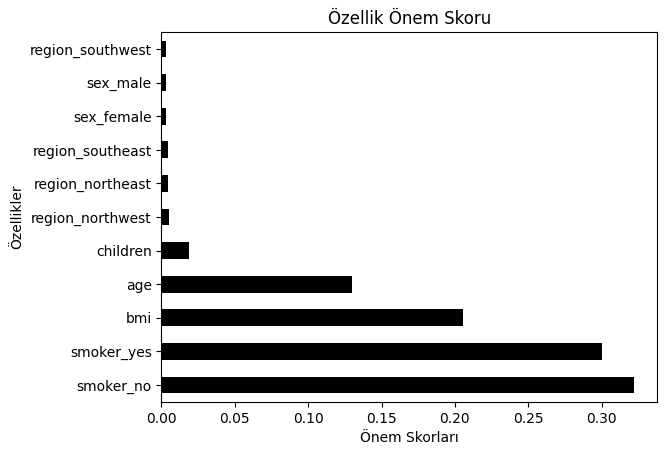

In [25]:
X = df.drop('charges', axis = 1)
y = df['charges']
model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh', color = 'black')
plt.title('Özellik Önem Skoru')
plt.xlabel('Önem Skorları')
plt.ylabel('Özellikler')
plt.show()

Korelasyon matrisi ve özellik önem skorundan elde ettiğimiz sonuçlara göre hedef değişken ile en yüksek ilişkilerin 'smoker' değişkeninde olduğunu görüyoruz fakat bu oranlar hayli yüksek olmadığından ötürü özellik mühendisliğine ihtiyaç duymuyoruz .

**Modelin Eğitim ve Test Olarak Ayrılması & MSE, R², MAE ve RMSE Değerlerinin Yorumlanması**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
# MSE Değeri
mse = mean_squared_error(y_test, y_pred)
print('MSE Değeri : ', mse)

MSE Değeri :  0.22926355667538661


In [28]:
# R² Değeri
r2_score = r2_score(y_test, y_pred)
print(f'R² Değeri : {r2_score:.2f}')

R² Değeri : 0.78


In [29]:
# MAE Değeri
mae = mean_absolute_error(y_test, y_pred)
print('MAE Değeri : ', mae)

MAE Değeri :  0.3453966926723374


In [30]:
# RMSE Değeri
rmse = root_mean_squared_error(y_test, y_pred)
print('RMSE Değeri : ', rmse)

RMSE Değeri :  0.4788147414975719


**Sonuçların Yorumlanması**
- MSE Değeri :  **0.22926355667538661**
- R² Değeri :  **0.78**
- MAE Değeri :  **0.3453966926723374**
- RMSE Değeri :  **0.4788147414975719**

- Modelimiz genel olarak iyi performans gösteriyor. (R²)
- MSE değerimizin düşük olması modelin küçük hatalar yaptığını gösterir.
- RMSE ve MAE arasında az fark olması da modelde büyük hatalar olmadığını gösterir.

**'charges' Değişkenine Logaritmik Dönüşüm Uygulanması**

In [31]:
df['log_charges'] = np.log1p(df['charges'])
df.head(15)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,log_charges
0,-1.438764,-0.453320,-0.908614,0.298584,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.261274
1,-1.509965,0.509621,-0.078767,-0.953689,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-3.072380
2,-0.797954,0.383307,1.580926,-0.728675,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.304437
3,-0.441948,-1.305531,-0.908614,0.719843,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.542233
4,-0.513149,-0.292556,-0.908614,-0.776802,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.499697
5,-0.584350,-0.807656,-0.908614,-0.785908,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.541351
6,0.483668,0.455486,-0.078767,-0.415500,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.536999
7,-0.157143,-0.479567,1.580926,-0.494728,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.682657
8,-0.157143,-0.136714,0.751079,-0.567017,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.837056
9,1.480485,-0.791252,-0.908614,1.293027,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.829873


In [32]:
# Logaritmik dönüşüm işleminden sonra 'log_charges' değişkenimizde 10 adet boş değer olduğunu gözlemledik
df.isnull().sum()

,0
age,0
bmi,0
children,0
charges,0
sex_female,0
sex_male,0
smoker_no,0
smoker_yes,0
region_northeast,0
region_northwest,0


In [33]:
# Bu boş değerleri ortalama ile dolduralım
df['log_charges'] = df['log_charges'].fillna(df['log_charges'].mean())

df.isnull().sum()

,0
age,0
bmi,0
children,0
charges,0
sex_female,0
sex_male,0
smoker_no,0
smoker_yes,0
region_northeast,0
region_northwest,0


In [34]:
# 'log_charges' değişkenini hedef değişken baz alarak metrikleri tekrar yorumlayıp karşılaştıralım.
X = df.drop('log_charges', axis = 1)
y = df['log_charges']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
# MSE Değeri
mse2 = mean_squared_error(y_test, y_pred)
print('MSE Değeri : ', mse2)

# R² Değeri
r2_score2 = r2_score(y_test, y_pred)
print(f'R² Değeri : {r2_score2:.2f}')

# MAE Değeri
mae2 = mean_absolute_error(y_test, y_pred)
print('MAE Değeri : ', mae2)

# RMSE Değeri
rmse2 = root_mean_squared_error(y_test, y_pred)
print('RMSE Değeri : ', rmse2)

MSE Değeri :  0.2540116891659014
R² Değeri : 0.83
MAE Değeri :  0.3192528020217751
RMSE Değeri :  0.503995723360726


Hedef değişkene logaritmik dönüşüm uyguladıktan sonra elde ettiğimiz metrikleri uygulamadan önceki değerlerle karşılaştıralım ;

**Logaritmik Dönüşümden Önce**
- MSE : 0.22926355667538661
- R² : 0.78
- MAE : 0.345396692673374
- RMSE : 0.4788147414975719

**Logaritmik Dönüşümden Sonra**
- MSE : 0.2540116891659014
- R² : 0.83
- MAE : 0.3192528020217751
- RMSE : 0.503995723360726

Bu değerler karşılaştırıldığında ;
- MSE ve RMSE değerinde ufak bir artış gözlemlenmiştir.
- MAE değerinde bir azalış görülmüştür.
- R² değerinde ise 0.5 'lik bir artış görülmüştür (0.78 -> 0.83)

Bu da modelimizin performansının logaritmik dönüşümle beraber arttığı sonucunu çıkartmamızı sağlar .

**Polinomsal Özellikler Oluşturma ve Performans Değerlendirme**

In [47]:
# Farklı dereceler için en iyi modeli bulma
best_degree = None
best_mse = float('inf')  # Başlangıçta MSE sonsuz olarak belirlenir
best_r2 = None
degrees = range(1, 10)  # 1'den 9'a kadar farklı dereceleri dene

mse_values = []
r2_values = []

In [75]:
# Polinomsal Regresyon: En iyi dereceyi bulma
best_degree = None
best_mse = float('inf')
best_r2 = None
degrees = range(2, 5)  # 2'den 4'e kadar dereceleri deniyoruz

mse_values = []
r2_values = []

In [76]:
for degree in degrees:
    # Polinomsal özellikler oluşturma
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Polinomsal regresyon modeli
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)

    # Performans ölçümleri
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    print(f"Polinom (d={degree}): MSE={mse_poly:.2f}, R²={r2_poly:.2f}")

    # En iyi dereceyi belirleme
    if mse_poly < best_mse:
        best_mse = mse_poly
        best_degree = degree
        best_r2 = r2_poly

print(f"\nEn iyi Polinomsal Derece: {best_degree}")
print(f"Polinomsal Regresyon: MSE={best_mse:.2f}, R²={best_r2:.2f}")

Polinom (d=2): MSE=0.11, R²=0.92
Polinom (d=3): MSE=0.11, R²=0.93
Polinom (d=4): MSE=0.93, R²=0.37

En iyi Polinomsal Derece: 3
Polinomsal Regresyon: MSE=0.11, R²=0.93


En iyi performans gösteren polinom derecesi '3' olarak belirlendi.

In [67]:
X.size

16056

In [68]:
y.size

1338

X ve y size ları aynı boyutta olmadığı için grafiğe dönüştürürken hata aldım (ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)) çözemedim

**Ridge ve Lasso Modellerinin Polinomsal Özelliklerle Eğitilmesi**

In [97]:
# Ridge regresyon modeli
ridge_params = {'alpha': np.logspace(-3, 3, 50)}  # Alpha değerleri için geniş bir aralık
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5)  # Çapraz doğrulama ile en iyi alpha değerini bulma
ridge_grid.fit(X_train_poly, y_train)

# En iyi Ridge modeli
best_ridge = ridge_grid.best_estimator_

# Ridge katsayılarını alma
ridge_coefficients = best_ridge.coef_

# Test setinde tahmin yapma
y_pred_ridge = best_ridge.predict(X_test_poly)

# Performans değerlendirmesi
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
ridge_best_alpha = ridge_grid.best_params_['alpha']

# Sonuçları yazdır
print(f"Ridge Modeli (En iyi Alpha: {ridge_best_alpha}):")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R^2 Skoru: {r2_ridge:.2f}")
print("Ridge Katsayıları:", ridge_coefficients)

Ridge Modeli (En iyi Alpha: 14.563484775012444):
Mean Squared Error (MSE): 0.11
R^2 Skoru: 0.93
Ridge Katsayıları: [ 0.1233541   0.00220582  0.03140002  0.44839488  0.00924853 -0.00924853
 -0.06649217  0.06649217  0.01651434  0.00723645 -0.00685585 -0.01689495
 -0.11245122 -0.01122318 -0.08531857 -0.14618037  0.0314319   0.0919222
  0.10896109  0.01439301 -0.02852319  0.0040278  -0.01190207  0.15975156
  0.00073123 -0.01539436 -0.01776419 -0.02991879  0.0321246   0.01083911
 -0.00863329  0.00924152 -0.02271922  0.01725465 -0.00157113 -0.02379407
 -0.02633449  0.00072914  0.03067088  0.07911166 -0.04771164 -0.01207697
  0.0090576  -0.0173844   0.0518038  -0.12180029  0.21539886  0.23299602
  0.38823159  0.06016329  0.09065711  0.11621599  0.11901017  0.12251161
  0.00924853  0.         -0.02083192  0.03008045  0.01102651 -0.00289648
 -0.06313737  0.06425587 -0.00924853 -0.04566025  0.03641172  0.00548783
  0.01013293  0.05628153 -0.08115082 -0.06649217  0.          0.00086052
 -0.008435

In [98]:
# Lasso Regresyon Modeli
lasso_params = {'alpha': np.logspace(-3, 3, 50)}  # Alpha değerleri için geniş bir aralık
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='r2', cv=5)  # Çapraz doğrulama ile en iyi alpha değerini bulma
lasso_grid.fit(X_train_poly, y_train)

# En iyi Lasso modeli
best_lasso = lasso_grid.best_estimator_

# Lasso katsayılarını alma
lasso_coefficients = best_lasso.coef_

# Test setinde tahmin yapma
y_pred_lasso = best_lasso.predict(X_test_poly)

# Performans değerlendirmesi
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
lasso_best_alpha = lasso_grid.best_params_['alpha']

# Sonuçları yazdır
print(f"Lasso Modeli (En iyi Alpha: {lasso_best_alpha}):")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R^2 Skoru: {r2_lasso:.2f}")
print("Lasso Katsayıları:", lasso_coefficients)

Lasso Modeli (En iyi Alpha: 0.0030888435964774815):
Mean Squared Error (MSE): 0.11
R^2 Skoru: 0.92
Lasso Katsayıları: [ 0.06472257  0.          0.          1.15162346  0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.12543631 -0.01196065 -0.07991396 -0.0994539  -0.          0.06005049
  0.16990518 -0.         -0.01216402  0.          0.          0.15843515
  0.00439405 -0.01249182 -0.00776944 -0.03016674  0.0279265   0.01640833
 -0.06529265 -0.         -0.          0.01082512 -0.         -0.02052643
 -0.03105701 -0.          0.02037153  0.09688103 -0.         -0.
  0.         -0.00403157  0.04933298 -0.19977058  0.          0.00670228
  0.07789217  0.         -0.          0.01488521 -0.          0.03164955
  0.          0.          0.          0.          0.         -0.
 -0.0613515   0.         -0.         -0.04359484  0.         -0.
 -0.          0.00634676 -0.13197273 -0.          0.          0.
 -0.          0.         -0.07556691  0.          0.  

**Ridge ;**
- MSE : 0.11
- R² : 0.93

**Lasso ;**
- MSE : 0.11
- R² : 0.92

**Polinomsal Regresyon (d = 3) ;**
- MSE=0.11
- R²=0.93

Çıktılara baktığımızda polinomsal regresyon ve Ridge birebir aynı sonuç verirken Lasso'da çok ufak bir farklılık olduğunu görüyoruz.